In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [51]:
dataset = pd.read_csv('./train.csv')
dataset.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [52]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [53]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
dataset[['Sex','Survived']].groupby('Sex',as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


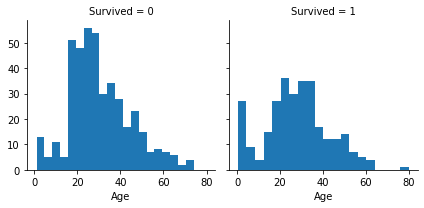

In [55]:
g = sns.FacetGrid(dataset, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [56]:
dataset[['Pclass','Survived']].groupby('Pclass',as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [57]:
dataset[['SibSp' , 'Survived']].groupby('SibSp' , as_index = False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [58]:
dataset.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [59]:
dataset[['Parch' , 'Survived']].groupby('Parch' , as_index = False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [60]:
dataset.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [61]:
dataset[['Embarked' , 'Survived']].groupby('Embarked' , as_index = False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



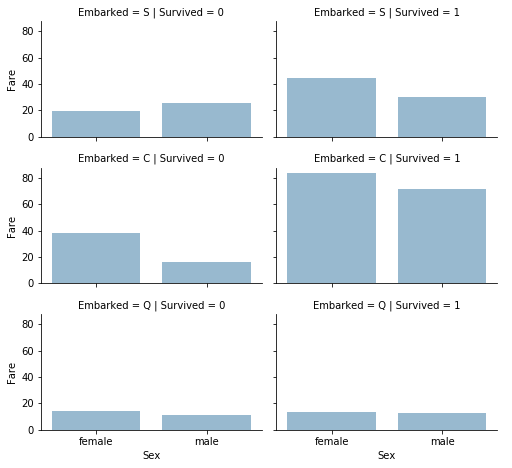

In [62]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(dataset, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [63]:
dataset[dataset.Embarked == 'S'].Survived.value_counts()

0    427
1    217
Name: Survived, dtype: int64

In [64]:
df = dataset[['Pclass','Sex','Age','Fare','Embarked','Survived']]
df.head()

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,male,22.0,7.2500,S,0
1,1,female,38.0,71.2833,C,1
2,3,female,26.0,7.9250,S,1
3,1,female,35.0,53.1000,S,1
4,3,male,35.0,8.0500,S,0


# Missing Values Imputation

To identify which columns have empty values

In [65]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
Survived      0
dtype: int64

So Age , Embarked have empty value columns. So we will
replace the empty values in Age with the mean age value
and S value for empty embarked column values.

In [66]:
df.fillna({'Age': df.Age.mean() ,
          'Embarked': 'S'} , inplace = True)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
df.head()

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,male,22.0,7.2500,S,0
1,1,female,38.0,71.2833,C,1
2,3,female,26.0,7.9250,S,1
3,1,female,35.0,53.1000,S,1
4,3,male,35.0,8.0500,S,0


In [68]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Survived    0
dtype: int64

# ENCODING THE VALUES

ONE HOT ENCODING

In [69]:
df = pd.get_dummies(df , columns=['Sex' , 'Embarked', 'Pclass'])
print(df)

           Age     Fare  Survived  Sex_female  Sex_male  Embarked_C  \
0    22.000000   7.2500         0           0         1           0   
1    38.000000  71.2833         1           1         0           1   
2    26.000000   7.9250         1           1         0           0   
3    35.000000  53.1000         1           1         0           0   
4    35.000000   8.0500         0           0         1           0   
..         ...      ...       ...         ...       ...         ...   
886  27.000000  13.0000         0           0         1           0   
887  19.000000  30.0000         1           1         0           0   
888  29.699118  23.4500         0           1         0           0   
889  26.000000  30.0000         1           0         1           1   
890  32.000000   7.7500         0           0         1           0   

     Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_3  
0             0           1         0         0         1  
1             0           0

In [80]:
X = df.drop(columns='Survived').values
Y = df['Survived'].values
print(X)
print(Y)

[[22.          7.25        0.         ...  0.          0.
   1.        ]
 [38.         71.2833      1.         ...  1.          0.
   0.        ]
 [26.          7.925       1.         ...  0.          0.
   1.        ]
 ...
 [29.69911765 23.45        1.         ...  0.          0.
   1.        ]
 [26.         30.          0.         ...  1.          0.
   0.        ]
 [32.          7.75        0.         ...  0.          0.
   1.        ]]
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 

In [81]:
# X = X.reshape( -1 , 1)

In [82]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2)
print(X_train)

[[ 29.69911765   7.8792       1.         ...   0.           0.
    1.        ]
 [ 22.          66.6          1.         ...   1.           0.
    0.        ]
 [ 29.69911765   7.2292       0.         ...   0.           0.
    1.        ]
 ...
 [ 36.         512.3292       0.         ...   1.           0.
    0.        ]
 [ 42.           7.55         0.         ...   0.           0.
    1.        ]
 [ 16.           9.5          0.         ...   0.           0.
    1.        ]]


In [83]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)
print(X_train)
print(X_test)

[[-0.01453157 -0.50336752  1.33871463 ... -0.5751879  -0.49692575
   0.89839112]
 [-0.60782257  0.70086522  1.33871463 ...  1.7385623  -0.49692575
  -1.11310094]
 [-0.01453157 -0.51669757 -0.74698519 ... -0.5751879  -0.49692575
   0.89839112]
 ...
 [ 0.47101197  9.84177772 -0.74698519 ...  1.7385623  -0.49692575
  -1.11310094]
 [ 0.93336963 -0.51011868 -0.74698519 ... -0.5751879  -0.49692575
   0.89839112]
 [-1.07018024 -0.47012853 -0.74698519 ... -0.5751879  -0.49692575
   0.89839112]]
[[ 0.05753048 -0.42592238 -0.70118947 ... -0.52779866 -0.56229571
   0.91943506]
 [-0.30288356 -0.10034803  1.42614807 ... -0.52779866  1.77842366
  -1.0876244 ]
 [-0.30288356 -0.44357825 -0.70118947 ... -0.52779866 -0.56229571
   0.91943506]
 ...
 [-1.37665891  0.2932603  -0.70118947 ... -0.52779866 -0.56229571
   0.91943506]
 [ 0.05753048 -0.44428449  1.42614807 ... -0.52779866 -0.56229571
   0.91943506]
 [-0.30288356 -0.10034803 -0.70118947 ... -0.52779866  1.77842366
  -1.0876244 ]]


In [84]:
import tensorflow as tf

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [86]:
classifier = Sequential([
#     Relu functions give an integer value for a positive value and 0 for a negative value
    Dense(units = 128 , activation = 'relu'),
    Dense(units = 64 , activation = 'relu'),
    Dense(units = 32 , activation = 'relu'),
    Dense(units = 8 , activation = 'relu'),
    Dense(units = 4 , activation = 'relu'),
    Dense(units = 2 , activation = 'relu'),
    Dense(units = 1 , activation = 'sigmoid')
])
classifier.compile(optimizer = 'rmsprop' , loss = 'binary_crossentropy' , metrics = ["accuracy"])

In [87]:
from keras.callbacks import EarlyStopping , ModelCheckpoint
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='auto')
# checkpointer = ModelCheckpoint(filepath = fname_saveWeights, verbose=1, save_best_only=True)

In [88]:
classifier.fit(X_train , Y_train , epochs= 300 , callbacks=[early_stopping_monitor], verbose=2)
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred)

Epoch 1/300
712/712 - 0s - loss: 0.6350 - acc: 0.6236
Epoch 2/300
712/712 - 0s - loss: 0.5381 - acc: 0.6236
Epoch 3/300
712/712 - 0s - loss: 0.5234 - acc: 0.7598


C:\Users\Dell\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning:

Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc



Epoch 4/300
712/712 - 0s - loss: 0.5161 - acc: 0.8048
Epoch 5/300
712/712 - 0s - loss: 0.5107 - acc: 0.8174
Epoch 6/300
712/712 - 0s - loss: 0.5062 - acc: 0.8132
Epoch 7/300
712/712 - 0s - loss: 0.5017 - acc: 0.8188
Epoch 8/300
712/712 - 0s - loss: 0.4969 - acc: 0.8188
Epoch 9/300
712/712 - 0s - loss: 0.4956 - acc: 0.8174
Epoch 10/300
712/712 - 0s - loss: 0.4911 - acc: 0.8258
Epoch 11/300
712/712 - 0s - loss: 0.4887 - acc: 0.8174
Epoch 12/300
712/712 - 0s - loss: 0.4875 - acc: 0.8244
Epoch 13/300
712/712 - 0s - loss: 0.4859 - acc: 0.8287
Epoch 14/300
712/712 - 0s - loss: 0.4810 - acc: 0.8216
Epoch 15/300
712/712 - 0s - loss: 0.4818 - acc: 0.8272
Epoch 16/300
712/712 - 0s - loss: 0.4782 - acc: 0.8272
Epoch 17/300
712/712 - 0s - loss: 0.4781 - acc: 0.8272
Epoch 18/300
712/712 - 0s - loss: 0.4758 - acc: 0.8272
Epoch 19/300
712/712 - 0s - loss: 0.4719 - acc: 0.8287
Epoch 20/300
712/712 - 0s - loss: 0.4708 - acc: 0.8287
Epoch 21/300
712/712 - 0s - loss: 0.4685 - acc: 0.8272
Epoch 22/300
712

712/712 - 0s - loss: 0.3537 - acc: 0.8624
Epoch 153/300
712/712 - 0s - loss: 0.3601 - acc: 0.8525
Epoch 154/300
712/712 - 0s - loss: 0.3523 - acc: 0.8722
Epoch 155/300
712/712 - 0s - loss: 0.3540 - acc: 0.8567
Epoch 156/300
712/712 - 0s - loss: 0.3572 - acc: 0.8610
Epoch 157/300
712/712 - 0s - loss: 0.3539 - acc: 0.8539
Epoch 158/300
712/712 - 0s - loss: 0.3537 - acc: 0.8666
Epoch 159/300
712/712 - 0s - loss: 0.3534 - acc: 0.8596
Epoch 160/300
712/712 - 0s - loss: 0.3512 - acc: 0.8624
Epoch 161/300
712/712 - 0s - loss: 0.3519 - acc: 0.8610
Epoch 162/300
712/712 - 0s - loss: 0.3507 - acc: 0.8666
Epoch 163/300
712/712 - 0s - loss: 0.3494 - acc: 0.8596
Epoch 164/300
712/712 - 0s - loss: 0.3581 - acc: 0.8624
Epoch 165/300
712/712 - 0s - loss: 0.3485 - acc: 0.8638
Epoch 166/300
712/712 - 0s - loss: 0.3487 - acc: 0.8581
Epoch 167/300
712/712 - 0s - loss: 0.3441 - acc: 0.8638
Epoch 168/300
712/712 - 0s - loss: 0.3530 - acc: 0.8596
Epoch 169/300
712/712 - 0s - loss: 0.3551 - acc: 0.8581
Epoch 

Epoch 299/300
712/712 - 0s - loss: 0.3210 - acc: 0.8764
Epoch 300/300
712/712 - 0s - loss: 0.3223 - acc: 0.8694
[[False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [Fals

In [89]:
from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(Y_test , y_pred)
print(cm)

[[90 15]
 [24 50]]


# Random Forest

In [25]:
classifier = RandomForestClassifier(n_jobs =  -1,
    n_estimators= 500,
     warm_start= True,
    max_depth= 6,
    min_samples_leaf= 2,
    max_features = 'sqrt',
    verbose =  0)
classifier.fit(X_train , Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=True)

In [26]:
# y_pred = classifier.predict(X_test)
# print(y_pred)

[0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1
 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]


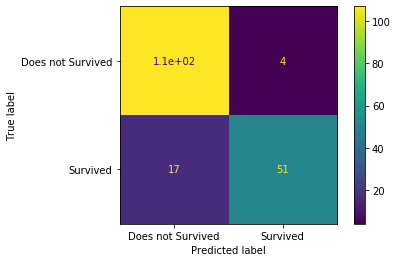

In [27]:
plot_confusion_matrix(classifier , X_test , Y_test , display_labels=["Does not Survived" , "Survived"])

In [28]:
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test , y_pred)
print(score)

0.88268156424581


# Random Forest - 2

In [29]:
classifier = RandomForestClassifier(n_jobs =  -1,
    n_estimators= 400,
     warm_start= True, 
#      max_features= 0.2,
    random_state= 2,
    max_depth= 5,
    min_samples_leaf= 1,
    max_features = 'sqrt',
    criterion= 'entropy',                   
    verbose =  0)
classifier.fit(X_train , Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=2, verbose=0,
                       warm_start=True)

In [30]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1
 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]


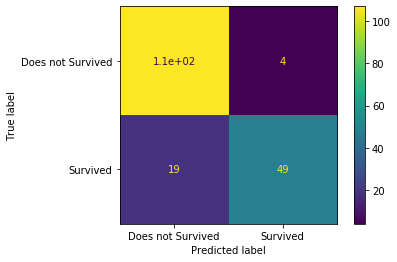

In [31]:
plot_confusion_matrix(classifier , X_test , Y_test , display_labels=["Does not Survived" , "Survived"])

In [32]:
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test , y_pred)
print(score)

0.8715083798882681


# SVC

In [33]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf' , degree= 3)
print(classifier)
classifier.fit(X_train , Y_train)
y_pred = classifier.predict(X_test)
print(y_pred)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
[0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1
 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]


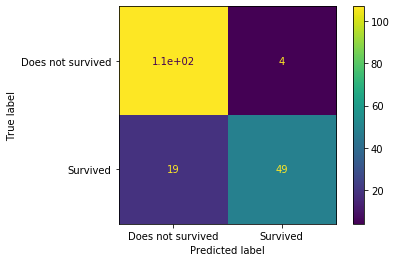

In [34]:
plot_confusion_matrix(classifier , X_test , Y_test , display_labels=["Does not survived" , "Survived"])

In [35]:
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test , y_pred)
print(score)

0.8715083798882681


# K-NN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print(Y_pred)

[0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1
 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]


In [37]:
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test , Y_pred)
print(score)

0.8491620111731844


In [90]:
submision = pd.DataFrame({
        "PassengerId": dfte["PassengerId"],
        "Survived": y_pred
    })
submision.to_csv('./submision.csv', index=False)

NameError: name 'dfte' is not defined